# 03. 리샘플링 (Resampling: permutation testing and bootstrap)

- 특히 빈도주의 통계에서 많은 통계 절차는 일부 데이터 생성 메커니즘에서 반복적으로 샘플링된 성능을 기반으로 함
- 많은 경우 이러한 메커니즘을 사용할 수 없거나 분석적으로 다루기가 너무 어려울 수 있으며  
- 리샘플링 방법은 많은 경우 이러한 메커니즘에서 샘플링을 계산적으로 시뮬레이션하기 위한 유연한 도구 세트를 제공
  
<br>
  

## 03-01. $p$-values 와 귀무가설 유의성 검정
- 귀무가설 유의성 검정(NHST)은 가장 널리 사용되는 통계 방법 중 하나
- NHST의 주요 관심 대상은, $p-$value이며,
  
  이는 영가설하에서 샘플링할 때 빈도를 제한하는 것에 따라 정의됨

- 이러한 빈도는 순열 테스트를 사용하여 매우 유연한 방식으로 계산적 평가가 가능

<br>

#### 예)
* 이표본 t-검정은 평균 $\mu_1$과 $\mu_2$를 가진 두 표본 $X_1$과 $X_2$가 동일한 평균($\mu_1=\mu_2$)을 가지는지 테스트하는 데 사용
  - 이 검정은 두 표본이 정규 분포를 따른다고 가정
  - 귀무가설 $H_0$은 $\mu_1=\mu_2$
  - 검정 통계량은

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_1^2/N_1 + s_2^2/N_2}},$$

- $\bar{X}_1$, $\bar{X}_2$는 표본평균이며, $s^2_1$, $s^2_2$는 표본분산이며, $N_1$과 $N_2$는 표본 크기
- 귀무가설 $H_0$하에서 검정통계량은 스튜던트 $t$분포를 따르며,

  이는 $p-$value를 계산하기 위해 사용

<br>

#### 일반적인 NHST의 절차
1. 귀무가설 $H_0$과, 대립가설 $H_1$을 설정하고,
  
  두 가설의 차이를 검정할 $t$통계량을 선정
2. 관측값 $t(X)$하에서의 검정 통계량 계산
3. $p$-value 계산
4. $p$-value가 사전에 설정된 유의수준보다 작다면 귀무가설 $H_0$를 기각

<br>


- 일반적인 사용 예로는 두 샘플 $X_1$과 $X_2$가 동일한 분포에서 나온 것인지,
  
  하나의 샘플 $X_1$이 특정 분포에서 나온 것인지 테스트하는 것이 존재
  
- 가정에 따라 이러한 질문은 예를 들어 Student's t-검정과 Wilcoxon 순위 합 검정을 사용하여 검정 가능



<br>

- **NHST 방법을 개발하는 데 있어 주요 과제는 $H_0$ 조건에서 검정 통계량의 분포를 결정하는 것**
  - 이는 p-값을 결정하는 데 필요
- 이미 모든 것이 정규 분포를 따른다고 가정한 위의 간단한 예시에서는, 이 분포를 정확하게 평가할 수 없었음
  
  $\rightarrow$ 순열 검정와 같은 계산 방법이 도움이 될 수 있지만, 더 많은 계산량과 통계적 검정력이 저하되는 경우가 존재
  
  $\rightarrow$ **따라서 순열 검정은 분석적 솔루션이 없는 경우에만 사용**

<br>

## 03-02. 순열 검정
- 순열 검정은 시뮬레이션을 통하여, 귀무가설 하에서의 검정 통계량의 분포를 평가하기 위해 사용

#### 두 표본 $X_1$과 $X_2$가 동일한 분포에서 나오는지 확인하기 위한 검정
- $H_0$ : 두 표본은 동일한 분포
- $H_1$ : 분포 간의 차이가(다른 평균, 다른 분산)이 존재

<br>

- $H_0$에서의 표본을 시뮬레이션하기 위하여, 랜덤으로 $X_1$과 $X_2$의 요소를 재구성 (reshuffle)
  
  (요소를 합친 뒤 다시 분배)

  $\rightarrow$ 랜덤 리셔플을 $M$번 반복함으로써, 귀무가설 하에서의 분포 $p(t|H_0)$를 따르는 $M$개의 순열 검정 통계량 $t_1, ..., t_M$ 산출

  - 이러한 결과 중 적어도 관측값 $t(X)$만큼 극단적인 결과의 수를 $B$로 가정하면, 다음과 같은 순열 $p-$value를 얻음

$$p = P(t_i \text{ is at least as extreme as } t(X) | H_0) = \frac{B+1}{M+1}.$$
  
- B와 M 모두에 +1을 추가하는 것은 작은 $p$-value의 과소평가를 피하기 위해 중요 (Phipson과 Smyth (2010)).
  - 이를 사용하지 않으면 매우 작은 M을 가진 $p=0$을 얻을 수 있으며, 이는 잘못된 결론을 초래할 수 있음
  - 이 형태에서 최소 $p$-value은 $1/(M+1)$이며,
    
    이는 일부 응용(예: 유전학 및 유전체학)에 필요한 매우 작은 $p$-value를 얻기 위해서는 매우 많은 수의 순열이 필요함을 알 수 있음

In [48]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
npr.seed(42)

def shuffle(x1, x2):
    """2개 배열의 요소들을 랜덤으로 리셔플링"""
    n1 = len(x1)
    z = npr.permutation(np.concatenate((x1, x2)))
    return z[0:n1], z[n1:]

- 생성할 순열의 수

In [3]:
N_perm = 1000

- 표본 생성

In [5]:
x1 = npr.normal(size=20)
x2 = npr.normal(size=20) + 0.5

In [7]:
print("mean(x1):", np.mean(x1))
print("mean(x2):", np.mean(x2))

mean(x1): -0.026690372375591066
mean(x2): 0.46860344268971216


- 두 표본의 실제 차이

In [8]:
truediff = np.abs(np.mean(x1) - np.mean(x2))

- 리셔플된 순열을 생성한 후 평균 차이 계산

In [14]:
meandiffs = np.zeros(N_perm)
for i in range(N_perm):
    z1, z2 = shuffle(x1, x2)
    meandiffs[i] = np.abs(np.mean(z1) - np.mean(z2))

In [15]:
print('p-value:', (np.sum(truediff <= meandiffs)+1)/(len(meandiffs)+1))

p-value: 0.12287712287712288


<br>

## 03-03. 구조화된 모집단에 대한 순열 검정
- 두 학교 간의 시험 점수 차이가 통계적으로 유의미한지 평가하기 위해 순열 검정을 적용한다고 가정
  
  $→$ 이 검정은 두 학교의 학생 수 사이에 중요한 차이는 학교의 정체성뿐이라고 가정합니다.

  $→$ 이 가정이 항상 현실적인 것은 아님

  $→$ 예를 들어, 부모 교육 수준의 분포가 학교마다 다를 수 있으며, 이것이 관찰된 시험 점수에 영향을 미칠 수 있다는 것을 알 수 있기 때문

  $→$ 이러한 교란 요인을 알고 있다면, 순열이 교란 요인의 분포를 변경하지 않도록 함으로써 이를 수정할 수 있음

  $→$ 예를 들어, 순열을 알려진 하위 그룹 내에서만 혼합되도록 계층화함으로써, 즉 고학력 부모와 저학력 부모를 가진 학생들을 별도로 순열

<br>

- **학생 성적의 차이는 부모 교육 수준이라는 인구통계적 요인에 의해서 발생할 수 있지만,**
  
  **표준 순열 테스트에서는 이를 감지하지 못하고, 학교 간의 통계적 유의미한 차이라고 식별**

In [36]:
N_perm = 1000

- 학교 1의에서 부모 교육 수준

In [37]:
n1_high = 30
n1_low = 10

- 학교 2의 부모 교육 수준

In [38]:
n2_high = 10
n2_low = 30

In [39]:
def merge(x1, x2):
    """데이터 병합 함수"""
    return np.concatenate((x1, x2))

- **실제 모델: 부모의 학력이 높을수록, 학생은 높은 점수를 받으며, 이는 학교와는 무관**

In [40]:
school1_high = npr.randn(n1_high) + 1.4
school2_high = npr.randn(n2_high) + 1.4
school1_low = npr.randn(n1_low)
school2_low = npr.randn(n2_low)

In [41]:
school1 = merge(school1_high, school1_low)
school2 = merge(school2_high, school2_low)

print(np.mean(school1), np.mean(school2))

1.2023477097542552 0.42356801995510923


In [53]:
truediff = np.abs(np.mean(school1) - np.mean(school2))
print(truediff)

0.7787796897991459


#### 계층화되지 않은 표준 순열 검정

In [43]:
meandiffs = np.zeros(N_perm)
for i in range(N_perm):
    z1, z2 = shuffle(school1, school2)
    meandiffs[i] = np.abs(np.mean(z1) - np.mean(z2))

print('non-stratified p-value:', (np.sum(truediff <= meandiffs)+1)/(len(meandiffs)+1))

non-stratified p-value: 0.000999000999000999


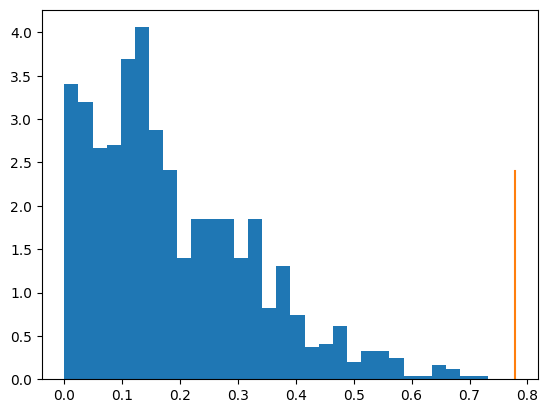

In [49]:
plt.hist(meandiffs, 30, density=True)
plt.plot((truediff, truediff), (0, 2.4))
plt.show()

<br>

- 부모의 교육 수중으로 계층화된 순열 검정

In [44]:
meandiffs2 = np.zeros(N_perm)
for i in range(N_perm):
    z1_low, z2_low = shuffle(school1_low, school2_low)
    z1_high, z2_high = shuffle(school1_high, school2_high)

    z1 = merge(z1_low, z1_high)
    z2 = merge(z2_low, z2_high)

    meandiffs2[i] = np.abs(np.mean(z1) - np.mean(z2))

print('stratified p-value:', (np.sum(truediff <= meandiffs2)+1)/(len(meandiffs2)+1))

stratified p-value: 0.1008991008991009


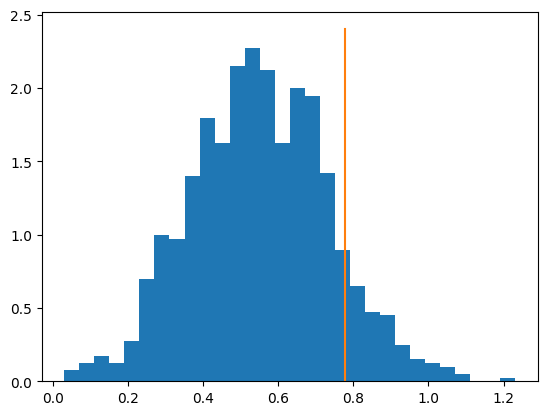

In [54]:
plt.hist(meandiffs2, 30, density=True)
plt.plot((truediff, truediff), (0, 2.4))
plt.show()

<br>

### 02. 귀무가설 유의성 검정의 장단점 및 주의 사항
- NHST는 통계적 유의성을 평가하는 데 유용할 수 있지만 다음과 같은 몇 가지 제한 사항 존재

1. p-값은 신중하게 해석해야 하며.
  
  **일반적으로 생각하는 것과는 달리, p-값은 귀무가설이 참일 확률을 측정하지 않음**

2. 계산된 p-값은 사전에 지정된 검정에만 엄격하게 유효하며,
  
  계산된 p-값의 다른 분석에 적용하는 것은, 해당 분석의 이론적 보장을 무너뜨릴 수 있음

3. 검정의 오탐 확률에 대한 오류 제어는 다중 검정에서 오탐 오류의 수가 매우 많을 수 있음을 의미 (개별 테스트에서 오탐 확률 5%는 100개의 테스트에서 평균적으로 5개의 오탐을 의미)


<br>

## 03-03. 부트스트랩 샘플링
- **통계학의 근본적인 질문 중 하나는 개별 관찰된 표본의 결과를, 더 큰 모집단으로 변환하는 것**
- 동일한 모집단에서 다르게 추출된 표본에서는 결과가 어떻게 될지에 대한 질문이 포함
- 특히 빈도주의 통계학은 데이터 생성 메커니즘 $p(x)$에서 반복 샘플링된 방법의 성능이 중요

- 일반적으로 실제 관측값의 생성 메커니즘 $p(x)$는 알려져 있지 않거나 접근할 수 없음
  
  $\rightarrow$ **부트스트랩 샘플링은 데이터 생성 메커니즘에 대한 접근이 필요한 계산을, 계산적으로 근사화하는 접근 방식을 제공**

- 부트스트랩 원리는 경험적 데이터 분포 $p_e(x)$를 복원 샘플링하여 $p(x)$를 근사하는 것을 제안
  
  - 일반적으로 원본 데이터 세트와 동일한 크기의 데이터 세트를 반복 복원 샘플링하면, 원본 데이터 세트의 샘플링과 관련된 불확실성을 추정할 수 있음

<br>

- **부트스트랩 샘플링의 가장 일반적인 사용은 일부 매개변수 $\theta$ 추정과 같은 다양한 통계 절차에 대한 신뢰 구간을 평가하는 것**

<br>

- 원래 데이터 세트 $X = (x_1, \dots, x_N)$에 $N$개의 샘플이 있다고 가정할 때,
  
  부트스트랩 샘플링은 $M$개의 복원 샘플링 데이터 세트 $X^*_i$, $i = 1, \dots, M$를 생성하는 방식으로 작동
  
  - 복원 샘플링은, 샘플링 내 일부 요소는 중복되고, 일부 요소는 1번도 추출 되지 않을 수 있음

- 각 $M$개의 복원 샘플 데이터 $X^*_i$에서, 추정하고자 하는 매개변수 $\theta^*_i$를 계산한 후,

  계산된 매개변수 세트를 통하여 신뢰구간 $[h_{\alpha/2}, h_{1-\alpha/2}],$을 계산

<br>

- 원래 데이터 세트의 평균

In [55]:
npr.seed(42)
x = npr.normal(size=100)

print(np.mean(x))

-0.10384651739409384


<br>

- 부트스트랩 샘플들의 각 평균 세트와.
- 해당 세트에서의 2.5, 97.5 분위수

In [56]:
means = np.zeros(1000)
for i in range(1000):
    I = npr.randint(100, size=100)
    means[i] = np.mean(x[I])

print(np.percentile(means, [2.5, 97.5]))

[-0.27233642  0.06285149]
